# Spatial Analysis

In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
from src.training.preprocess import load_data_class 

In [2]:
df = load_data_class('Comm-Ind', 'DR5', True)
df = df.drop(['TimeStep', 'Treatment', 'Salvage'], axis=1)
df.head()

,DR5,BF_BA,OHost_BA,BF_Stock,OHost_Stock,NonHost_Stock,BF_QMD,ELEV,SLOPE,ASPECT,LAT,SiteInd,LON,Voucher
StandID,,,,,,,,,,,,,,
0023200606030102900043,-23.834684,0.279354,1.116816,1.0804,1.569744,32.4026,5.060632,450,6.0,175.0,44.94077,74.0,-68.06066,False
0023200606030102900130,-5.205855,0.220614,4.766196,11.1036,1.444767,21.7586,3.180016,340,0.0,0.0,44.99047,30.0,-67.98495,False
0023200606030102900140,-23.051571,0.650989,0.841934,10.8856,1.319711,55.8000,4.129338,80,10.0,207.0,44.84648,31.0,-67.22527,False
0023200606030102900142,-20.349367,0.559308,2.032160,5.1958,1.517733,24.7251,4.134207,70,0.0,0.0,44.88655,39.0,-67.47946,False
0023200606030102900185,-23.242517,3.468417,10.200234,97.2985,3.832171,30.3204,6.511221,340,0.0,0.0,45.39772,35.5,-67.46192,False


In [3]:
df.Voucher.value_counts()

False    3601
True     1325
Name: Voucher, dtype: int64

In [4]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.LON, df.LAT)
)

In [5]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='LON', ylabel='LAT'>

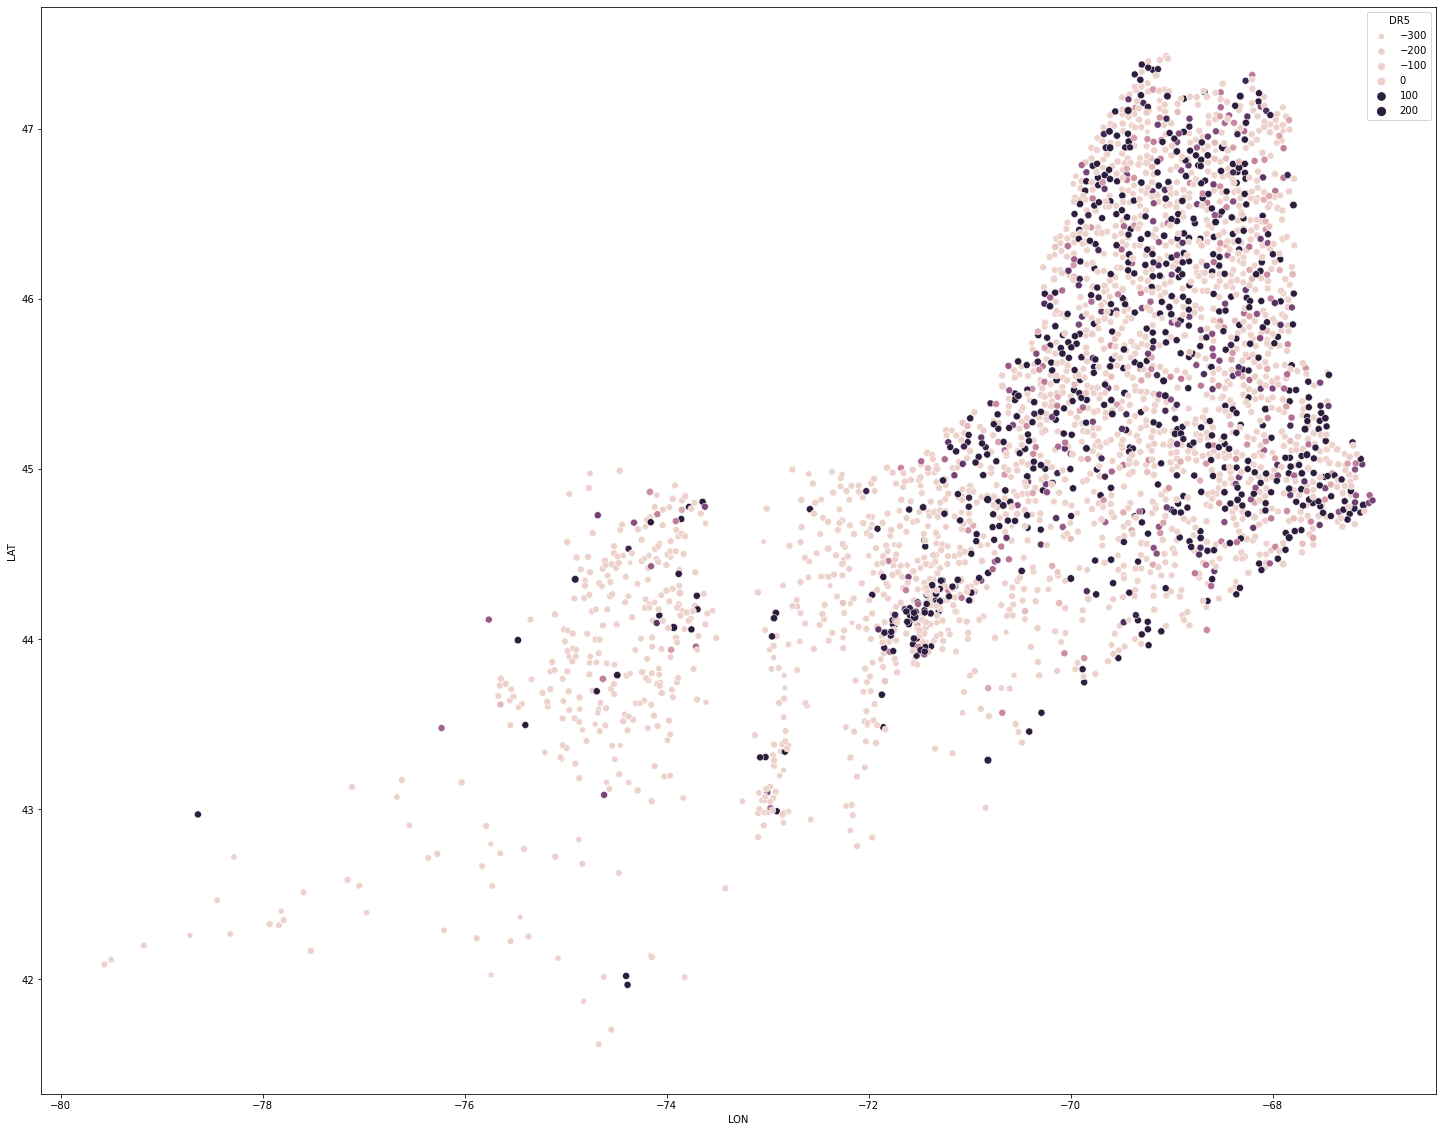

In [8]:
plt.figure(figsize=(25,20))
sns.scatterplot(
    data=df, x="LON", y="LAT", hue="DR5", size="DR5", hue_norm=(0, 7)
)